In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [3]:
customers_df = pd.read_csv('data/olist_customers_dataset.csv')
sellers_df = pd.read_csv('data/olist_sellers_dataset.csv')
orders_df = pd.read_csv('data/olist_orders_dataset.csv')
products_df = pd.read_csv('data/olist_products_dataset.csv')
geolocation_df = pd.read_csv('data/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('data/olist_order_items_dataset.csv')
order_reviews_df = pd.read_csv('data/olist_order_reviews_dataset.csv')
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')
trans_df = pd.read_csv('data/product_category_name_translation.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [6]:
orders_df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
# 결측치가 있는 행 제거
orders_df = orders_df.dropna()


In [8]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [9]:
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [10]:
products_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

products_df.isnull().sum()


product_id                 0
product_category_name    610
product_photos_qty       610
dtype: int64

In [11]:
# 결측치가 있는 행 제거
products_df = products_df.dropna()

In [12]:
products_df.isnull().sum()

product_id               0
product_category_name    0
product_photos_qty       0
dtype: int64

In [13]:
geolocation_df.isnull().sum()


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [14]:
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [15]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [16]:
order_reviews_df = order_reviews_df.drop(columns=['review_comment_title', 'review_comment_message'])

# 삭제 후 컬럼 확인
print(order_reviews_df.columns)


Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


In [17]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [18]:
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

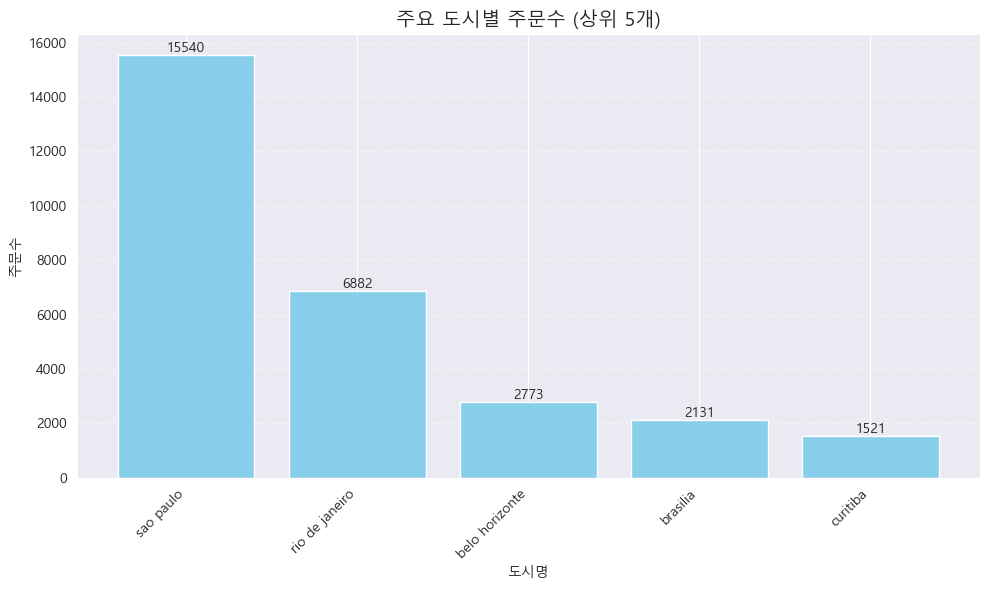

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows용 폰트
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')    # MacOS용 폰트
else:
    plt.rc('font', family='DejaVu Sans')    # Linux는 대체 폰트

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 1️⃣ 데이터 불러오기 (혹시 customers_df가 없으면 아래 주석 해제!)
# customers_df = pd.read_csv('olist_customers_dataset.csv')

# 2️⃣ 도시별 주문수 집계
city_order_counts = customers_df['customer_city'].value_counts().reset_index()
city_order_counts.columns = ['customer_city', 'order_count']

# 3️⃣ 상위 5개 도시만 추출
top_5_cities = city_order_counts.head(5)

# 4️⃣ 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_cities['customer_city'], top_5_cities['order_count'], color='skyblue')

plt.title('주요 도시별 주문수 (상위 5개)', fontsize=14)
plt.xlabel('도시명')
plt.ylabel('주문수')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 막대 위에 주문수 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


리뷰 점수 평균: 4.09


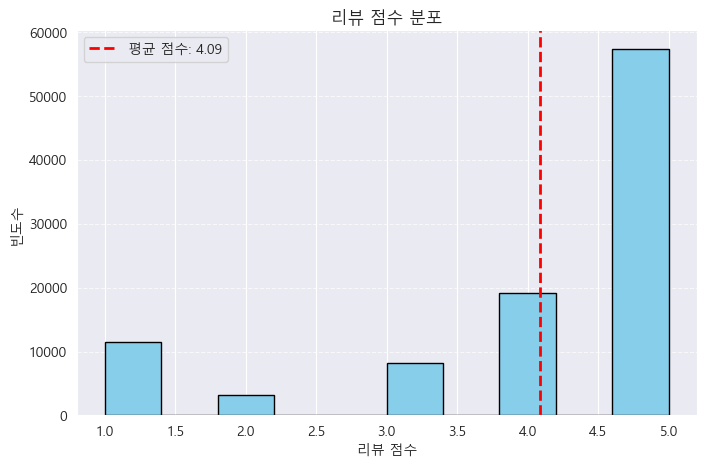

In [20]:
import matplotlib.pyplot as plt

# 1. 리뷰 점수 평균 계산
mean_score = order_reviews_df['review_score'].mean()
print(f"리뷰 점수 평균: {mean_score:.2f}")

# 2. 히스토그램 시각화
plt.figure(figsize=(8,5))
plt.hist(order_reviews_df['review_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('리뷰 점수 분포')
plt.xlabel('리뷰 점수')
plt.ylabel('빈도수')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 평균선 표시
plt.axvline(mean_score, color='red', linestyle='dashed', linewidth=2, label=f'평균 점수: {mean_score:.2f}')
plt.legend()

plt.show()


In [21]:
median_score = order_reviews_df['review_score'].median()
print(f"리뷰 점수 중앙값: {median_score}")


리뷰 점수 중앙값: 5.0


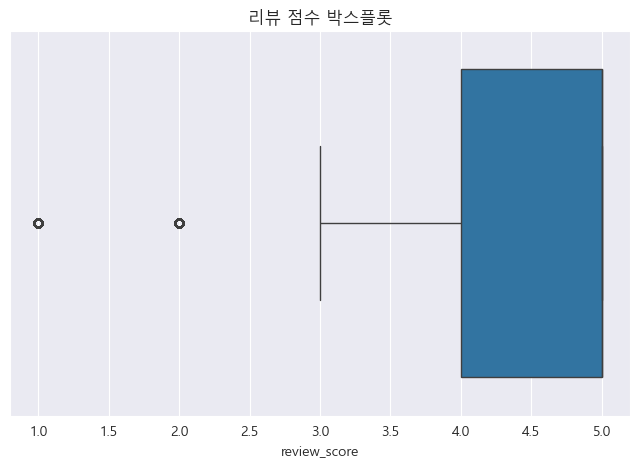

C:\Users\Playdata2\AppData\Local\Temp\ipykernel_8824\1699765795.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(order_reviews_df['review_score'], shade=True)


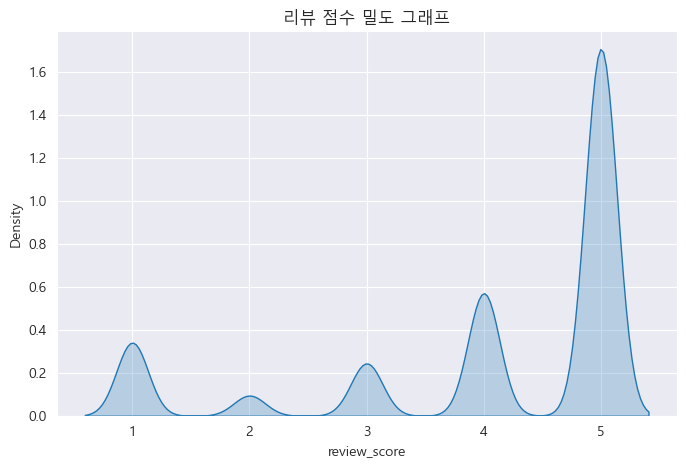

In [22]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=order_reviews_df['review_score'])
plt.title('리뷰 점수 박스플롯')
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(order_reviews_df['review_score'], shade=True)
plt.title('리뷰 점수 밀도 그래프')
plt.show()


In [23]:
## 점수별비율
score_counts = order_reviews_df['review_score'].value_counts(normalize=True).sort_index()
print(score_counts)


review_score
1    0.115133
2    0.031756
3    0.082430
4    0.192917
5    0.577763
Name: proportion, dtype: float64


In [24]:
import pandas as pd



# 2️⃣ products_df와 번역 데이터 병합 (카테고리 영어 이름 붙이기)
products_df = products_df.merge(trans_df, on='product_category_name', how='left')

# 3️⃣ order_items_df와 products_df 병합 (제품 ID 기준으로)
order_items_full = order_items_df.merge(
    products_df[['product_id', 'product_category_name_english']],
    on='product_id',
    how='left'
)

# 4️⃣ 카테고리별 판매량 집계
category_sales = order_items_full['product_category_name_english'].value_counts().reset_index()
category_sales.columns = ['product_category_name_english', 'sales_count']

# 5️⃣ 판매량 상위 10개 카테고리 출력
print(category_sales.head(10))


  product_category_name_english  sales_count
0                bed_bath_table        11115
1                 health_beauty         9670
2                sports_leisure         8641
3               furniture_decor         8334
4         computers_accessories         7827
5                    housewares         6964
6                 watches_gifts         5991
7                     telephony         4545
8                  garden_tools         4347
9                          auto         4235


payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64


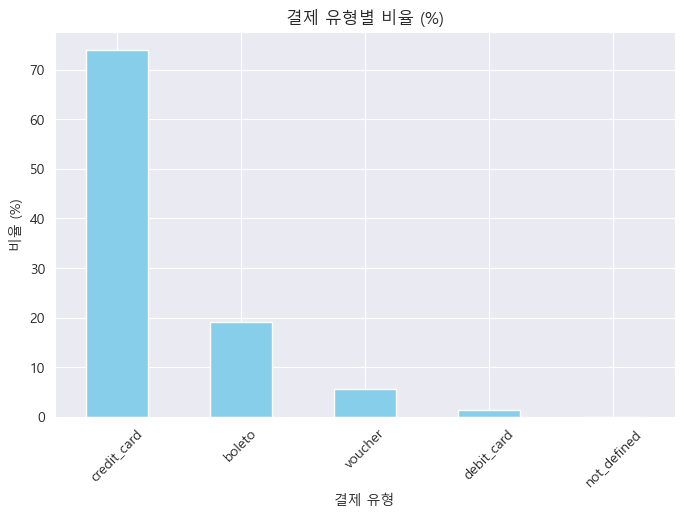

In [25]:
import pandas as pd

# 1️⃣ 결제 데이터 불러오기 (예시)
order_payments_df = pd.read_csv('data/olist_order_payments_dataset.csv')

# 2️⃣ 결제 유형별 비율 계산 (정규화)
payment_type_ratio = order_payments_df['payment_type'].value_counts(normalize=True) * 100

# 3️⃣ 결과 출력
print(payment_type_ratio)

# 4️⃣ (선택) 시각화 - 비율 막대그래프
import matplotlib.pyplot as plt

payment_type_ratio.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('결제 유형별 비율 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('결제 유형')
plt.xticks(rotation=45)
plt.show()


In [26]:
import pandas as pd


# 날짜 컬럼을 datetime으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

# 배송 기간(일) 계산 (배송 완료 날짜 - 구매 날짜)
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# 결측치 제거 (배송 완료 날짜가 없는 경우가 있음)
valid_delivery_times = orders_df['delivery_time_days'].dropna()

# 평균 배송 기간 계산
average_delivery_days = valid_delivery_times.mean()

print(f'평균 배송 기간: {average_delivery_days:.2f}일')


평균 배송 기간: 12.09일


In [27]:
# 1. 결측치가 있는 행 제거하고 복사본 생성
valid_orders = orders_df.dropna(subset=['order_estimated_delivery_date', 'order_delivered_customer_date']).copy()

# 2. 배송 지연 여부 컬럼 추가
valid_orders['is_late'] = valid_orders['order_delivered_customer_date'] > valid_orders['order_estimated_delivery_date']

# 3. 배송 지연 비율 계산
late_rate = valid_orders['is_late'].mean() * 100
print(f"배송 지연 비율: {late_rate:.2f}%")


배송 지연 비율: 8.11%


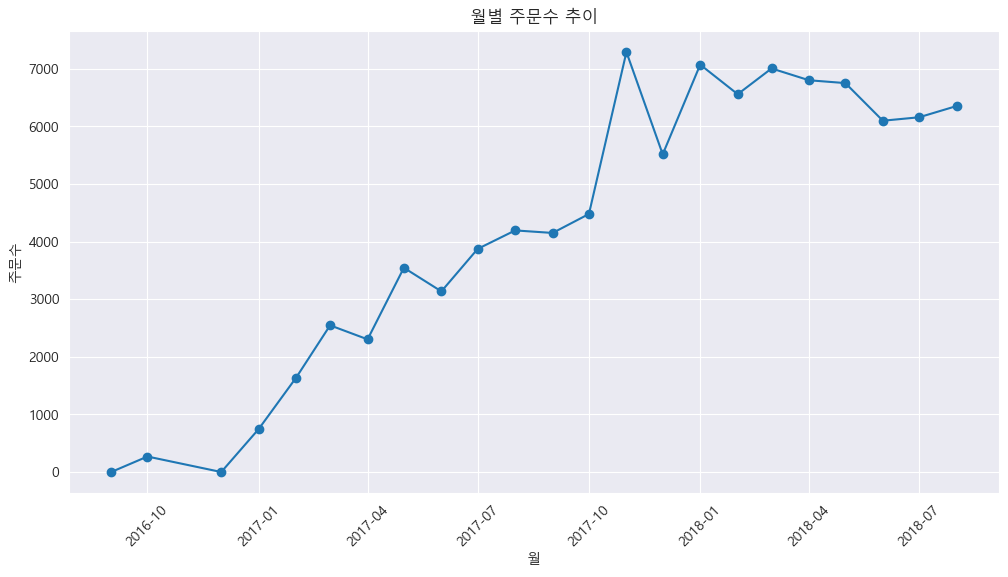

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 날짜 타입으로 변환
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# 2. 월별 주문 수 집계 (년-월 기준)
orders_df['order_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = orders_df.groupby('order_month').size().reset_index(name='order_count')

# 3. order_month를 datetime으로 변환 (시각화를 위해)
monthly_orders['order_month'] = monthly_orders['order_month'].dt.to_timestamp()

# 4. 시각화
plt.figure(figsize=(12,6))
plt.plot(monthly_orders['order_month'], monthly_orders['order_count'], marker='o')
plt.title('월별 주문수 추이')
plt.xlabel('월')
plt.ylabel('주문수')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [72]:
customers_df.columns


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [73]:
orders_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time_days', 'order_month'],
      dtype='object')

In [29]:
import pandas as pd



# 고객-주문 병합 (customer_id 기준)
customer_orders_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')

# 고객의 주문 개수 계산 (customer_unique_id 기준)
customer_order_counts = customer_orders_df.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_count')

# 재구매 고객 (2회 이상 주문한 고객)
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]

# 전체 고객 수 (unique customer)
total_customers = customer_order_counts['customer_unique_id'].nunique()

# 재구매 고객 수
repeat_customers_count = repeat_customers['customer_unique_id'].nunique()

# 재구매 고객 비율
repeat_customer_rate = (repeat_customers_count / total_customers) * 100

print(f'전체 고객 수: {total_customers}')
print(f'재구매 고객 수: {repeat_customers_count}')
print(f'재구매 고객 비율: {repeat_customer_rate:.2f}%')


전체 고객 수: 93342
재구매 고객 수: 2800
재구매 고객 비율: 3.00%


In [30]:


# customers_df, orders_df가 이미 로드되어 있다고 가정

# 1. 고객-주문 병합 (customer_id 기준)
customer_orders_df = pd.merge(customers_df, orders_df, on='customer_id', how='inner')

# 2. 고객별 주문 개수 계산
customer_order_counts = customer_orders_df.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_count')

# 3. 재구매 고객 필터링 (2회 이상 구매)
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]
repeat_customer_ids = repeat_customers['customer_unique_id']

# 4. 재구매 고객 주문 데이터만 추출
repeat_customer_orders = customer_orders_df[customer_orders_df['customer_unique_id'].isin(repeat_customer_ids)].copy()

# 5. order_purchase_timestamp 컬럼 datetime 변환
repeat_customer_orders['order_purchase_timestamp'] = pd.to_datetime(repeat_customer_orders['order_purchase_timestamp'])

# 6. 고객별 주문일 정렬
repeat_customer_orders = repeat_customer_orders.sort_values(by=['customer_unique_id', 'order_purchase_timestamp'])

# 7. 다음 주문일 생성
repeat_customer_orders['next_purchase_date'] = repeat_customer_orders.groupby('customer_unique_id')['order_purchase_timestamp'].shift(-1)

# 8. 구매 간격(일 단위) 계산
repeat_customer_orders['days_to_next_purchase'] = (repeat_customer_orders['next_purchase_date'] - repeat_customer_orders['order_purchase_timestamp']).dt.days

# 9. 결측치 제외하고 평균 구매 간격 계산
average_days_to_next_purchase = repeat_customer_orders['days_to_next_purchase'].dropna().mean()

print(f"재구매 고객의 평균 다음 구매까지 걸리는 일수: {average_days_to_next_purchase:.2f}일")




재구매 고객의 평균 다음 구매까지 걸리는 일수: 78.72일


In [31]:
# 재구매 고객 데이터프레임 준비 (customer_unique_id와 order_count 포함)
repeat_customers = customer_order_counts[customer_order_counts['order_count'] > 1]

# CSV로 저장
repeat_customers.to_csv('data/repeat_customers.csv', index=False)

print("재구매 고객 목록이 repeat_customers.csv 파일로 저장되었습니다.")


재구매 고객 목록이 repeat_customers.csv 파일로 저장되었습니다.


In [32]:
repeat_df=pd.read_csv('data/repeat_customers.csv')
repeat_df.columns

Index(['customer_unique_id', 'order_count'], dtype='object')

In [33]:
customers_df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [34]:
repeat_df.count()

customer_unique_id    2800
order_count           2800
dtype: int64

In [35]:
repeat_df.isnull().sum()

customer_unique_id    0
order_count           0
dtype: int64

In [36]:
repeat_df.columns

Index(['customer_unique_id', 'order_count'], dtype='object')

In [37]:

#리뷰가 높을수록 재구매율이 높은가?"
# 2️⃣ 고객-주문 병합
orders_df = pd.merge(orders_df, customers_df[['customer_id', 'customer_unique_id']], on='customer_id', how='left')
#
# 3️⃣ 고객별 주문 개수
order_counts = orders_df.groupby('customer_unique_id')['order_id'].nunique().reset_index(name='order_count')

# 4️⃣ 주문-리뷰 병합
orders_reviews_df = pd.merge(orders_df, order_reviews_df[['order_id', 'review_score']], on='order_id', how='left')

# 5️⃣ 주문-리뷰-주문수 병합
final_df = pd.merge(orders_reviews_df, order_counts, on='customer_unique_id', how='left')

# 6️⃣ 재구매 여부
final_df['is_repeat_customer'] = final_df['order_count'] > 1

# 7️⃣ 리뷰 점수별 재구매 비율
repeat_rate_by_score = final_df.groupby('review_score')['is_repeat_customer'].mean().reset_index()

print(repeat_rate_by_score)


   review_score  is_repeat_customer
0           1.0            0.060368
1           2.0            0.062585
2           3.0            0.064565
3           4.0            0.058842
4           5.0            0.068763


In [38]:
repeat_df

,customer_unique_id,order_count
0,004288347e5e88a27ded2bb23747066c,2
1,00a39521eb40f7012db50455bf083460,2
2,00cc12a6d8b578b8ebd21ea4e2ae8b27,2
3,011575986092c30523ecb71ff10cb473,2
4,011b4adcd54683b480c4d841250a987f,2
...,...,...
2795,ff03923ad1eb9e32304deb7f9b2a45c9,2
2796,ff44401d0d8f5b9c54a47374eb48c1b8,2
2797,ff8892f7c26aa0446da53d01b18df463,2
2798,ff922bdd6bafcdf99cb90d7f39cea5b3,3


In [39]:
# 먼저 merged_df 만들기 (repeat_df + customers_df)
merged_df = pd.merge(repeat_df, customers_df, on='customer_unique_id', how='left')



# merged_df와 orders_df를 customer_id 기준으로 병합
final_df = pd.merge(merged_df, orders_df, on='customer_id', how='left')



# final_df와 order_items_df를 order_id 기준으로 병합
final_df = pd.merge(final_df, order_items_df, on='order_id', how='left')



final_df = pd.merge(final_df, order_reviews_df, on='order_id', how='left')



final_df = pd.merge(final_df, products_df, on='product_id', how='left')

final_df=pd.merge(final_df,trans_df,on='product_category_name',how='left')

In [40]:
# datetime 타입으로 변환
final_df['order_approved_at'] = pd.to_datetime(final_df['order_approved_at'])
final_df['order_delivered_customer_date'] = pd.to_datetime(final_df['order_delivered_customer_date'])

# 배송 기간(일) 계산 (배송 완료일 - 주문 승인일)
final_df['delivery_duration_days'] = (final_df['order_delivered_customer_date'] - final_df['order_approved_at']).dt.days

# 결과 확인
print(final_df[['order_approved_at', 'order_delivered_customer_date', 'delivery_duration_days']].head())


    order_approved_at order_delivered_customer_date  delivery_duration_days
0 2017-07-27 14:25:14           2017-08-04 16:26:54                     8.0
1 2018-01-14 07:49:28           2018-01-19 22:14:14                     5.0
2 2018-05-23 20:35:15           2018-06-11 20:41:33                    19.0
3 2018-06-03 10:50:00           2018-06-19 16:04:46                    16.0
4 2017-03-21 19:25:23           2017-03-28 14:54:11                     6.0


In [41]:
final_df.isnull().sum()

customer_unique_id_x                 0
order_count                          0
customer_id                          0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_id                            22
order_status                        22
order_purchase_timestamp            22
order_approved_at                   22
order_delivered_carrier_date        22
order_delivered_customer_date       22
order_estimated_delivery_date       22
delivery_time_days                  22
order_month                         22
customer_unique_id_y                22
order_item_id                       22
product_id                          22
seller_id                           22
shipping_limit_date                 22
price                               22
freight_value                       22
review_id                           99
review_score                        99
review_creation_date                99
review_answer_timestamp  

In [42]:
final_df=final_df.dropna()

In [43]:
final_df.isnull().sum()

customer_unique_id_x               0
order_count                        0
customer_id                        0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_id                           0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
delivery_time_days                 0
order_month                        0
customer_unique_id_y               0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_id                          0
review_score                       0
review_creation_date               0
review_answer_timestamp            0
product_category_name              0
p

In [44]:
final_df.to_csv('data/final_merged_with_delivery_duration.csv', index=False)
print("CSV 파일 저장 완료! 파일명: final_merged_with_delivery_duration.csv")


CSV 파일 저장 완료! 파일명: final_merged_with_delivery_duration.csv


In [45]:
real_final_df=pd.read_csv('data/final_merged_with_delivery_duration.csv')
real_final_df.columns

Index(['customer_unique_id_x', 'order_count', 'customer_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time_days', 'order_month', 'customer_unique_id_y',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_photos_qty',
       'product_category_name_english_x', 'product_category_name_english_y',
       'delivery_duration_days'],
      dtype='object')

In [49]:
real_final_df.count()

customer_unique_id_x               7581
order_count                        7581
customer_id                        7581
customer_zip_code_prefix           7581
customer_city                      7581
customer_state                     7581
order_id                           7581
order_status                       7581
order_purchase_timestamp           7581
order_approved_at                  7581
order_delivered_carrier_date       7581
order_delivered_customer_date      7581
order_estimated_delivery_date      7581
delivery_time_days                 7581
order_month                        7581
customer_unique_id_y               7581
order_item_id                      7581
product_id                         7581
seller_id                          7581
shipping_limit_date                7581
price                              7581
freight_value                      7581
review_id                          7581
review_score                       7581
review_creation_date               7581


# XGBoost 모델링

In [50]:
# 1️⃣ order_purchase_timestamp 컬럼 datetime으로 변환
real_final_df['order_purchase_timestamp'] = pd.to_datetime(real_final_df['order_purchase_timestamp'])

# 2️⃣ 고객별로 구매일 정렬
real_final_df.sort_values(by=['customer_unique_id_x', 'order_purchase_timestamp'], inplace=True)

# 3️⃣ 다음 구매일 생성 (shift(-1))
real_final_df['next_purchase_date'] = real_final_df.groupby('customer_unique_id_x')['order_purchase_timestamp'].shift(-1)

# 4️⃣ 다음 구매까지 걸린 일수 계산
real_final_df['days_to_next_purchase'] = (
    real_final_df['next_purchase_date'] - real_final_df['order_purchase_timestamp']
).dt.days

# 5️⃣ 결측치 제거 (NaN 행 삭제)
real_final_df.dropna(subset=['days_to_next_purchase'], inplace=True)

# 6️⃣ 결과 확인 (앞부분)
print(real_final_df[['customer_unique_id_x', 'order_purchase_timestamp', 'next_purchase_date', 'days_to_next_purchase']].head(10))

# 7️⃣ 저장 (선택사항)
# real_final_df.to_csv('data/final_with_days_to_next_purchase_no_nan.csv', index=False)


                customer_unique_id_x order_purchase_timestamp  \
0   004288347e5e88a27ded2bb23747066c      2017-07-27 14:13:03   
2   00a39521eb40f7012db50455bf083460      2018-05-23 20:14:21   
6   00cc12a6d8b578b8ebd21ea4e2ae8b27      2017-03-21 19:25:22   
7   00cc12a6d8b578b8ebd21ea4e2ae8b27      2017-03-21 19:25:22   
4   00cc12a6d8b578b8ebd21ea4e2ae8b27      2017-03-21 19:25:23   
9   011575986092c30523ecb71ff10cb473      2018-02-17 15:54:49   
12  011b4adcd54683b480c4d841250a987f      2017-08-22 12:51:29   
10  011b4adcd54683b480c4d841250a987f      2018-02-15 11:40:57   
14  012452d40dafae4df401bced74cdb490      2017-06-18 22:46:42   
16  012a218df8995d3ec3bb221828360c86      2018-05-07 10:28:17   

    next_purchase_date  days_to_next_purchase  
0  2018-01-14 07:36:54                  170.0  
2  2018-06-03 10:12:57                   10.0  
6  2017-03-21 19:25:22                    0.0  
7  2017-03-21 19:25:23                    0.0  
4  2017-03-21 19:25:23                    0.

In [51]:
# 8️⃣ days_to_next_purchase가 120일 이상이면 이탈자로 판단하여 churn 컬럼 생성
real_final_df['churn'] = real_final_df['days_to_next_purchase'].apply(lambda x: 1 if x >=120  else 0)

# 9️⃣ 결과 확인
print(real_final_df[['customer_unique_id_x', 'days_to_next_purchase', 'churn']].head(10))

# 10️⃣ 저장 (선택사항)
# real_final_df.to_csv('data/final_with_days_to_next_purchase_churn.csv', index=False)


                customer_unique_id_x  days_to_next_purchase  churn
0   004288347e5e88a27ded2bb23747066c                  170.0      1
2   00a39521eb40f7012db50455bf083460                   10.0      0
6   00cc12a6d8b578b8ebd21ea4e2ae8b27                    0.0      0
7   00cc12a6d8b578b8ebd21ea4e2ae8b27                    0.0      0
4   00cc12a6d8b578b8ebd21ea4e2ae8b27                    0.0      0
9   011575986092c30523ecb71ff10cb473                   60.0      0
12  011b4adcd54683b480c4d841250a987f                  176.0      1
10  011b4adcd54683b480c4d841250a987f                    0.0      0
14  012452d40dafae4df401bced74cdb490                  329.0      1
16  012a218df8995d3ec3bb221828360c86                   42.0      0


In [58]:


print(real_final_df.count())
print(real_final_df['churn'].value_counts())

customer_unique_id_x               4795
order_count                        4795
customer_id                        4795
customer_zip_code_prefix           4795
customer_city                      4795
customer_state                     4795
order_id                           4795
order_status                       4795
order_purchase_timestamp           4795
order_approved_at                  4795
order_delivered_carrier_date       4795
order_delivered_customer_date      4795
order_estimated_delivery_date      4795
delivery_time_days                 4795
order_month                        4795
customer_unique_id_y               4795
order_item_id                      4795
product_id                         4795
seller_id                          4795
shipping_limit_date                4795
price                              4795
freight_value                      4795
review_id                          4795
review_score                       4795
review_creation_date               4795


In [53]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1) feature, target 설정
features = ['order_count', 'review_score', 'price', 'freight_value', 'delivery_duration_days']
X = real_final_df[features]
y = real_final_df['churn']

# 2) train/test 나누기 (test 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) train/validation 나누기 (validation 10%)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

from xgboost import XGBClassifier

# 양성 클래스 비율 계산
num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()
scale_pos_weight = num_neg / num_pos  # 불균형 비율

xgb_clf = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=5,
    eval_metric='logloss',
    use_label_encoder=False,
    early_stopping_rounds=10,
    scale_pos_weight=scale_pos_weight  # 클래스 불균형 보정
)

xgb_clf.fit(
    X_tr, y_tr,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# 5) 테스트 데이터 예측 및 평가
y_pred = xgb_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


[0]	validation_0-logloss:0.69227
[1]	validation_0-logloss:0.69150
[2]	validation_0-logloss:0.69076
[3]	validation_0-logloss:0.69004
[4]	validation_0-logloss:0.68933
[5]	validation_0-logloss:0.68859
[6]	validation_0-logloss:0.68791
[7]	validation_0-logloss:0.68721
[8]	validation_0-logloss:0.68657
[9]	validation_0-logloss:0.68590
[10]	validation_0-logloss:0.68529
[11]	validation_0-logloss:0.68465
[12]	validation_0-logloss:0.68407
[13]	validation_0-logloss:0.68345
[14]	validation_0-logloss:0.68284
[15]	validation_0-logloss:0.68225
[16]	validation_0-logloss:0.68167
[17]	validation_0-logloss:0.68110
[18]	validation_0-logloss:0.68058
[19]	validation_0-logloss:0.68021
[20]	validation_0-logloss:0.67971
[21]	validation_0-logloss:0.67937
[22]	validation_0-logloss:0.67885
[23]	validation_0-logloss:0.67852
[24]	validation_0-logloss:0.67808
[25]	validation_0-logloss:0.67777
[26]	validation_0-logloss:0.67732
[27]	validation_0-logloss:0.67700
[28]	validation_0-logloss:0.67660
[29]	validation_0-loglos

C:\Users\Playdata2\miniconda3\envs\ai_basic_env\Lib\site-packages\xgboost\callback.py:386: UserWarning: [11:58:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  self.starting_round = model.num_boosted_rounds()


[101]	validation_0-logloss:0.66086
[102]	validation_0-logloss:0.66074
[103]	validation_0-logloss:0.66062
[104]	validation_0-logloss:0.66057
[105]	validation_0-logloss:0.66039
[106]	validation_0-logloss:0.66032
[107]	validation_0-logloss:0.66009
[108]	validation_0-logloss:0.65992
[109]	validation_0-logloss:0.65982
[110]	validation_0-logloss:0.65961
[111]	validation_0-logloss:0.65945
[112]	validation_0-logloss:0.65939
[113]	validation_0-logloss:0.65918
[114]	validation_0-logloss:0.65905
[115]	validation_0-logloss:0.65897
[116]	validation_0-logloss:0.65879
[117]	validation_0-logloss:0.65867
[118]	validation_0-logloss:0.65860
[119]	validation_0-logloss:0.65841
[120]	validation_0-logloss:0.65831
[121]	validation_0-logloss:0.65824
[122]	validation_0-logloss:0.65794
[123]	validation_0-logloss:0.65783
[124]	validation_0-logloss:0.65771
[125]	validation_0-logloss:0.65740
[126]	validation_0-logloss:0.65735
[127]	validation_0-logloss:0.65725
[128]	validation_0-logloss:0.65722
[129]	validation_0-l